# **Credit Card Fraud Detection** <br>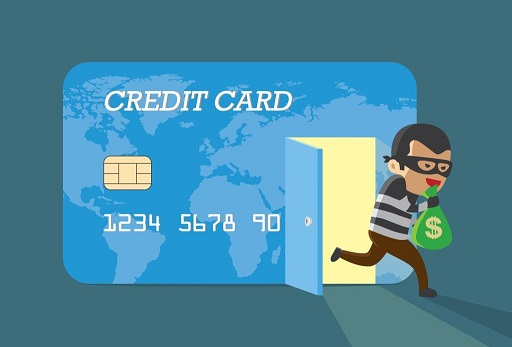

Student Name:  Disanayaka D.M.S.P.  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Gunawardhana I.K.Y.K.

Registration Number: EG/2021/4488  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
EG/2021/4535


**Introduction**<br><br>
In this project, we are going to utilize the Credit Card Fraud Detection Dataset, which contains various features that might influence the identification of fraudulent transactions. The goal is to build a model to predict whether a credit card transaction is fraudulent or legitimate based on the available features.

**Dataset Description<br><br>**
The dataset contains transactions made by European cardholders in September 2013, and includes both fraudulent and legitimate transactions. Below is a description of the features:





*   V1 to V28: Principal components derived through PCA (Principal Component Analysis) transformation, which anonymize the original features.
*   Time: The number of seconds elapsed between each transaction and the first transaction in the dataset.



*   Amount: The transaction amount, which can be used for example-dependent cost-sensitive learning.
*   Class: The target variable, where:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
 1 = Fraudulent transaction.<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
 0 = Legitimate transaction.

**Context and Goal<br><br>**
Credit card fraud is a significant issue for financial institutions. Identifying fraudulent transactions efficiently is crucial to minimizing losses and protecting customers. The goal of this project is to detect fraudulent transactions in a credit card dataset using machine learning techniques.<br><br>

**Data Processing and Approach**
<br><br>


1.  Exploratory Data Analysis (EDA):

*   Visualize the distribution of key features such as Amount, Time, and Class.
*   Explore the class imbalance between legitimate and fraudulent transactions.


2.   Data Preprocessing:

*   Handle missing values, if any.
*   Normalize numerical features like Amount and Time.

*   Address class imbalance using techniques like SMOTE or undersampling.
*   Split the data into training and testing sets.


**Machine Learning Models:**

*   Implement classification models like Logistic Regression, Decision Trees, Random Forest, and XGBoost.
*   Evaluate the models using metrics such as Precision, Recall, F1-score, and AUPRC (Area Under the Precision-Recall Curve) due to the class imbalance.

**Expected Outcome**

A machine learning model capable of accurately classifying fraudulent transactions.
Insights into the most influential features that contribute to fraudulent transactions.

# **Importing the Libraries**



In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# **Importing the Dataset**

In [180]:
#loading dataset to a Pnadas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')


In [181]:
#first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [182]:
#last five rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **Exploratory Data Analysis (EDA)**

In [183]:
# Identify the shape of the loaded dataframe
print("Shape of the dataframe:", credit_card_data.shape)

Shape of the dataframe: (284807, 31)


In [184]:
#dataset infomation
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [185]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Our model have no missing values.

**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**


Categorical Features:

['Class']


Numerical Features:

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount']

In [186]:
# Categorical Features:
# 'Class' is the categorical feature as it indicates fraud (1) or non-fraud (0).

categorical_features = ['Class']

# Numerical Features:
# 'V1' to 'V28' are the PCA-transformed features, 'Time' and 'Amount' are numerical.
numerical_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                      'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                      'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount']

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Class']
Numerical Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount']


In [187]:
# Generate descriptive analytics for the numerical features in the dataset
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Generaate a correlation heatmap to explore the relationships between features and identify any strong positive or negative correlations that may impact the model's performance

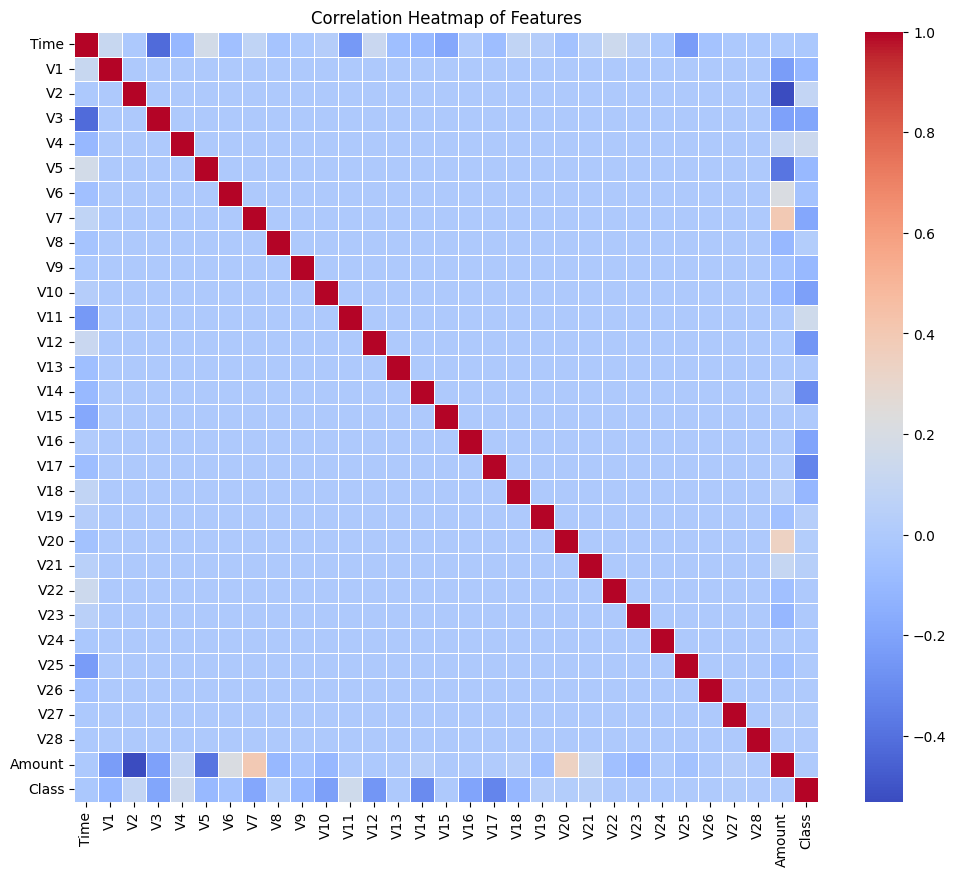

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `new_Dataset` is your DataFrame
# Compute the correlation matrix
correlation_matrix = credit_card_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


# **Data Visualization**

Q:In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?

1. Avoid Data Leakage
2. Accurate Representation of Training Data
3. Prevent Overfitting

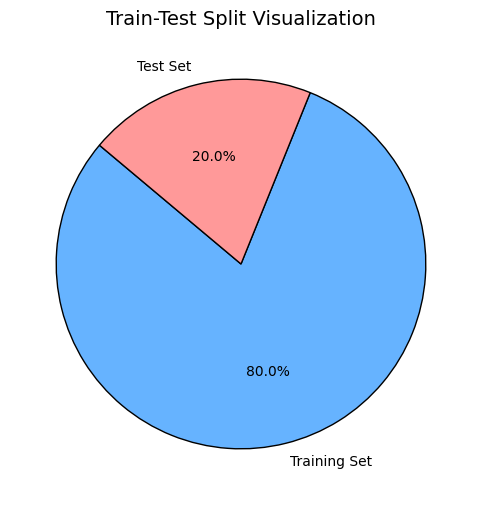

In [189]:
import matplotlib.pyplot as plt

# Data for the train-test split
labels = ['Training Set', 'Test Set']
sizes = [80, 20]  # Typically, 80% for training and 20% for testing
colors = ['#66b3ff', '#ff9999']

# Create a pie chart to show the distribution
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Train-Test Split Visualization', fontsize=14)
plt.show()


In [190]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

# Separate independent variables (features) and dependent variable (target)
X = credit_card_data.drop('Class', axis=1)  # Features: Drop the 'Class' column
y = credit_card_data['Class']  # Target variable: 'Class' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
# Print number of training data points
print("Training set shape:", X_train.shape)


Training set shape: (227845, 30)


In [192]:
# Print number of testing data points

print("Test set shape:", X_test.shape)

Test set shape: (56962, 30)


**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> A:Yes. Highly Imbalanced.<br>
1. Bias Toward the Majority Class<br>
2. Lower Recall for the Minority Class<br>
3. Misleading Performance Metrics<br>



In [193]:

#distribution of legit transaction and fraudlant trasactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


**This dataset is highly unbalanced. More than 90% of data are in one set.**



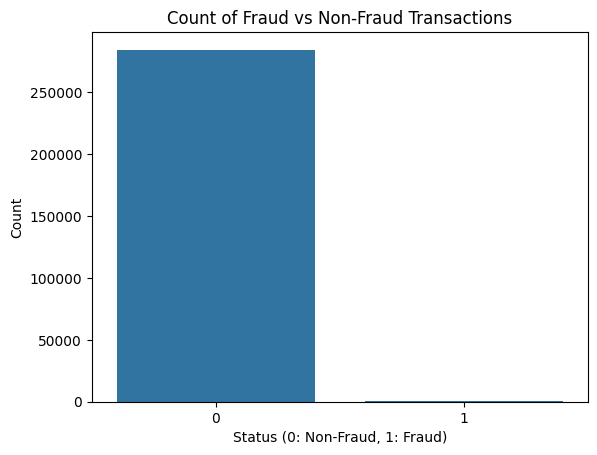

In [194]:
# Import the necessary library
import seaborn as sns
import matplotlib.pyplot as plt

# Print the counts of the target variable 'status' (fraud vs non-fraud transactions)
sns.countplot(x='Class', data=credit_card_data)
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.xlabel('Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Amount')

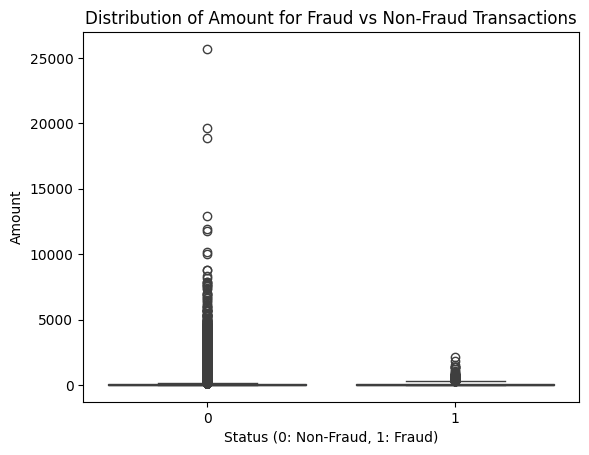

In [195]:
# visualize the distribution of Amount for fraud vs non-fraud transactions
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Distribution of Amount for Fraud vs Non-Fraud Transactions')
plt.xlabel('Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')


# **Data Preprocessing**

This dataset is highly unbalanced.more than 90% of data are in one set.



0-> Normal Transaction

1-> fraudlant Transaction

In [196]:
#seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [197]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Legitimate Transactions: (284315, 31)
Fraudulent Transactions: (492, 31)


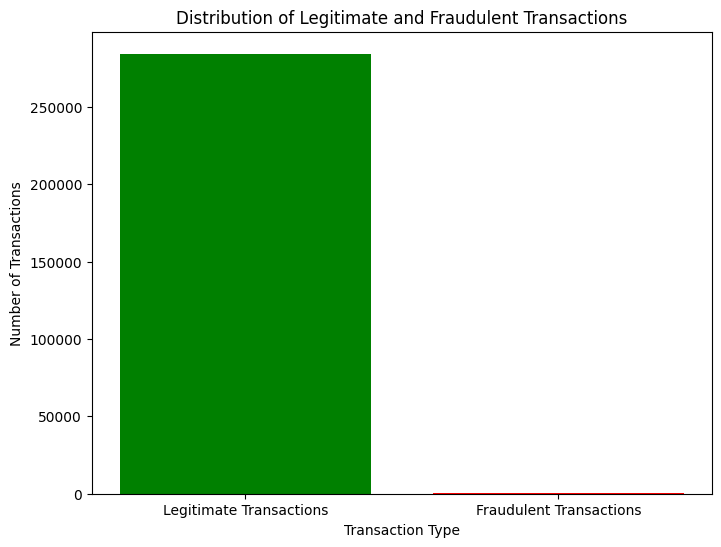

In [198]:
# Print the shape of each dataset (number of rows)
print(f"Legitimate Transactions: {legit.shape}")
print(f"Fraudulent Transactions: {fraud.shape}")

# Data for plotting
categories = ['Legitimate Transactions', 'Fraudulent Transactions']
counts = [legit.shape[0], fraud.shape[0]]  # Number of rows in each dataset

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['green', 'red'])
plt.title('Distribution of Legitimate and Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

In [199]:
#statistiacal measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [200]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [201]:
#compare the value for both trasactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Under-Sampling**




Build a sample dataset containing a similar ditribution of normal transactiona and fraudlent transaction


Numbwer of fraudulent transaction --> 492

In [202]:
legit_sample = legit.sample(n=492)


Concatanating two Dataframes

In [203]:
new_Dataset = pd.concat([legit_sample,fraud],axis=0)

In [204]:
new_Dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101654,67905.0,0.502075,-0.424323,0.762812,3.700595,-0.316429,1.054768,-0.081918,0.353452,-1.133545,...,0.356052,0.257005,-0.302226,-0.334726,0.202825,0.097365,-0.039021,0.063779,291.95,0
241321,150977.0,2.201780,-0.670622,-2.097997,-0.839323,-0.265039,-1.871436,0.243800,-0.575126,-0.776544,...,0.355078,0.893778,-0.083315,0.076378,0.389003,0.077729,-0.094683,-0.077332,49.90,0
245672,152853.0,-0.347166,-4.166443,-4.090042,0.097193,-0.432641,-0.936639,2.583482,-0.880953,-0.155537,...,1.097427,0.405086,-1.304153,0.986659,0.161284,0.875209,-0.397730,0.123426,1300.18,0
39431,39835.0,-1.907371,1.986405,-0.397887,0.703101,-0.110631,1.106662,-0.176617,1.588603,-1.029669,...,0.273811,0.836788,0.166038,-0.945526,-0.362072,-0.225045,0.140063,0.029301,59.05,0
254491,156755.0,-1.360804,0.504092,0.903522,-0.322070,-0.456045,0.856718,-0.490968,0.453102,1.654509,...,0.006402,0.494496,0.244767,0.739911,-1.256833,0.258282,-0.727347,-0.058037,33.92,0


In [205]:
new_Dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [206]:
new_Dataset['Class'].value_counts()

,count
Class,
0,492
1,492


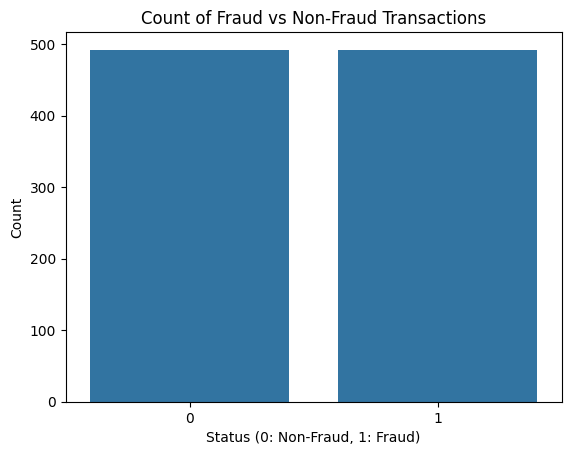

In [207]:
# Print the counts of the target variable 'status' (fraud vs non-fraud transactions)
sns.countplot(x='Class', data=new_Dataset)
plt.title('Count of Fraud vs Non-Fraud Transactions')
plt.xlabel('Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [208]:
new_Dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94896.876016,-0.000209,-0.067124,0.085410,0.033864,0.091166,-0.033837,0.044480,0.032634,0.034038,...,-0.030068,-0.001816,-0.000932,0.047718,-0.030987,0.008990,-0.008540,0.012985,-0.024263,79.804512
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# **Train Test Splitting**

In [209]:
x = new_Dataset.drop(columns='Class',axis=1)
y = new_Dataset['Class']

In [210]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
101654   67905.0  0.502075 -0.424323  0.762812  3.700595 -0.316429  1.054768   
241321  150977.0  2.201780 -0.670622 -2.097997 -0.839323 -0.265039 -1.871436   
245672  152853.0 -0.347166 -4.166443 -4.090042  0.097193 -0.432641 -0.936639   
39431    39835.0 -1.907371  1.986405 -0.397887  0.703101 -0.110631  1.106662   
254491  156755.0 -1.360804  0.504092  0.903522 -0.322070 -0.456045  0.856718   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [211]:
print(y)

101654    0
241321    0
245672    0
39431     0
254491    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split data into training data and testing data

In [212]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [213]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


# **Handling Missing Values**


In [214]:
#checking the number of missing values in each column
new_Dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There are no missing values to handle

# **Treating Outliers and duppplicate records**

using Boxplots for outliers

<ipython-input-215-52da3e3e5fe0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=new_Dataset, palette='coolwarm')


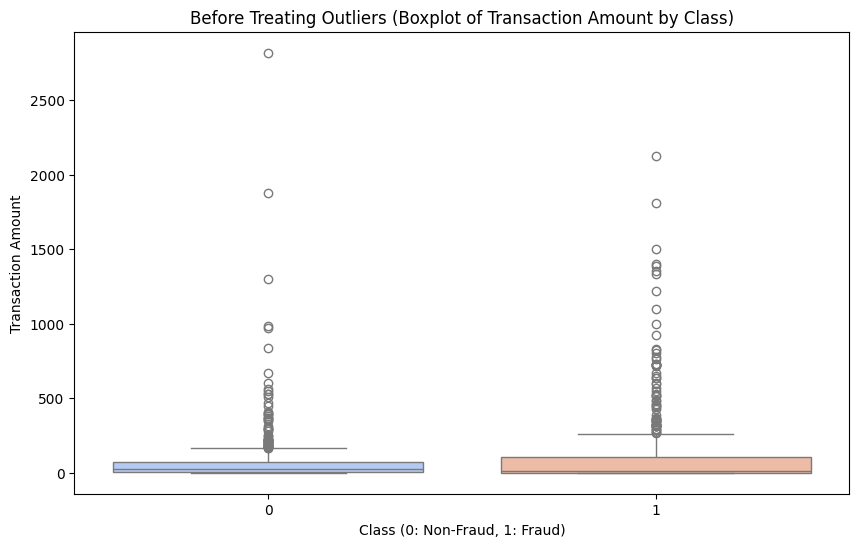

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Boxplot before treating outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=new_Dataset, palette='coolwarm')
plt.title('Before Treating Outliers (Boxplot of Transaction Amount by Class)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# Apply capping to outliers in 'Amount'
# Calculate the upper and lower cap values for 'Amount'
upper_cap = new_Dataset['Amount'].quantile(0.95)  # 95th percentile
lower_cap = new_Dataset['Amount'].quantile(0.05)  # 5th percentile

# Apply capping: Limit the values to the upper and lower bounds
new_Dataset['Amount'] = new_Dataset['Amount'].clip(lower=lower_cap, upper=upper_cap)

Treating outliers (capping) reduced recall, which is critical for fraud detection, and did not improve overall performance.Avoid capping outliers, as they may contain important information for detecting fraud. Focus on alternative techniques like log transformations or robust models.

In [216]:
# Check for duplicates in the dataset
duplicates = new_Dataset.duplicated().sum()  # Counts the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

# Optionally, remove duplicates if necessary
new_Dataset = new_Dataset.drop_duplicates()

#After treating duplicates
duplicates = new_Dataset.duplicated().sum()  # Counts the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 19
Number of duplicate rows: 0


# **Feature Scaling**





In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Assuming the dataset is already loaded as 'new_Dataset' and contains the 'Class' column as the target

# 1. Split dataset into features (X) and target (y)
X = new_Dataset.drop(columns=['Class'])  # Features
y = new_Dataset['Class']  # Target (fraud or not)

# 2. Apply Undersampling to balance the dataset
X_undersampled, y_undersampled = resample(X[y == 0], y[y == 0],
                                           replace=False, n_samples=len(y[y == 1]), random_state=42)
X_undersampled = pd.concat([X_undersampled, X[y == 1]])
y_undersampled = pd.concat([y_undersampled, y[y == 1]])

# 3. Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

# 4. Standardize the features for Logistic Regression (do not scale for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# 6. Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auprc = average_precision_score(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUPRC: {auprc:.4f}")
    print(f"AUC: {auc:.4f}")




## Handling Categorical Variables

The Credit Card Fraud Detection dataset does not contain categorical features, as all features are either numerical (like Time, Amount) or PCA-transformed (like V1, V2, ..., V28).

# **Model traning with Logistic Regression Model**

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

In [219]:
# Train the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [220]:
# Train the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Predictions for the training set
y_train_pred = logreg_model.predict(X_train_scaled)
y_train_pred_prob = logreg_model.predict_proba(X_train_scaled)[:, 1]

# Evaluation metrics for the training set
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred_prob)
auprc_train = average_precision_score(y_train, y_train_pred_prob)

# Print the training set metrics
print("Training Set Metrics:")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-Score: {f1_train}")
print(f"Accuracy: {accuracy_train}")
print(f"AUC: {auc_train}")
print(f"AUPRC: {auprc_train}")


Training Set Metrics:
Precision: 0.9911764705882353
Recall: 0.9083557951482479
F1-Score: 0.9479606188466948
Accuracy: 0.951058201058201
AUC: 0.9853327265726187
AUPRC: 0.988460349732504


In [221]:

# Predict on the test data
y_pred = logreg_model.predict(X_test_scaled)
y_pred_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUPRC and AUC

In [222]:
# Evaluate the model: Calculate precision, recall, f1-score, accuracy, AUC, and AUPRC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
auprc = average_precision_score(y_test, y_pred_prob)



In [223]:
# Print the evaluation metrics
print("Logistic Regression Model Evaluation:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"AUPRC: {auprc:.4f}")


Logistic Regression Model Evaluation:
Precision: 0.9583
Recall: 0.9020
F1-Score: 0.9293
Accuracy: 0.9263
AUC: 0.9881
AUPRC: 0.9899


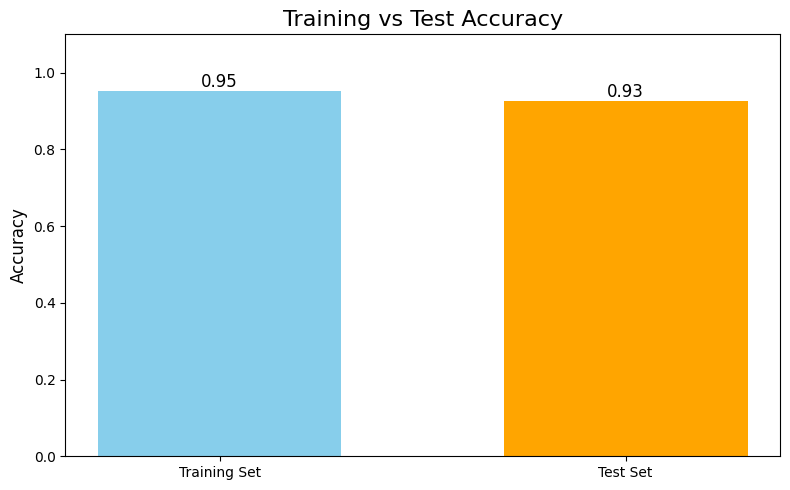

In [224]:
import matplotlib.pyplot as plt

# Assuming you have calculated accuracy for training and test sets
train_accuracy = accuracy_train
test_accuracy = accuracy

# Data for plotting
datasets = ['Training Set', 'Test Set']
accuracies = [train_accuracy, test_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(datasets, accuracies, color=['skyblue', 'orange'], width=0.6)

# Add title and labels
plt.title('Training vs Test Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)  # Accuracy ranges between 0 and 1

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


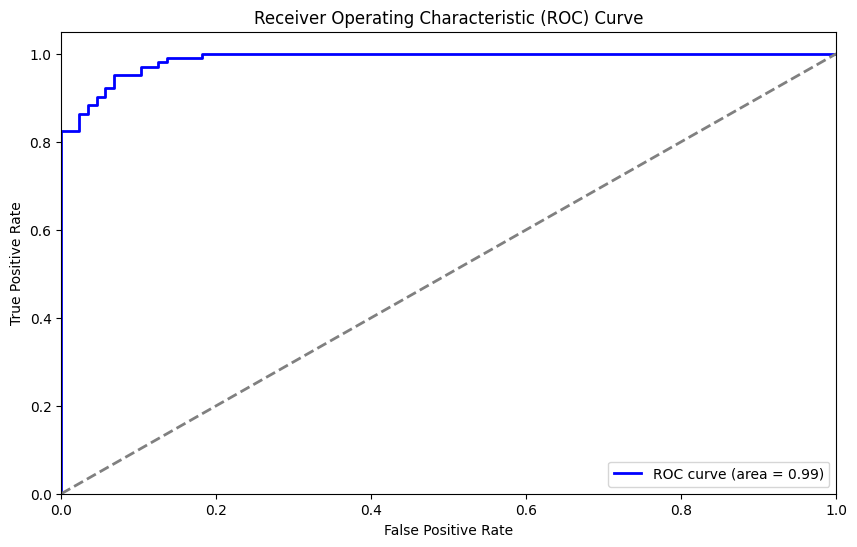

In [225]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


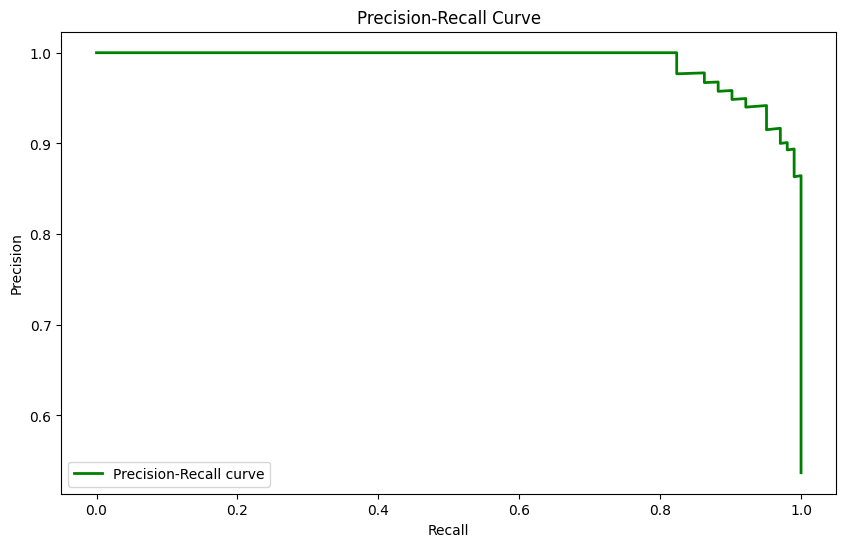

In [226]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision and Recall at different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(10,6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



# **Model training with Random Forest Algorithm**

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)



In [228]:

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [229]:
# Predictions for the training set
y_train_pred = model.predict(X_train)
y_train_pred_prob = model.predict_proba(X_train)[:, 1]

# Calculate metrics for the training set
precision_train_rf = precision_score(y_train, y_train_pred)
recall_train_rf = recall_score(y_train, y_train_pred)
f1_train_rf = f1_score(y_train, y_train_pred)
accuracy_train_rf = accuracy_score(y_train, y_train_pred)
auc_score_train_rf = roc_auc_score(y_train, y_train_pred_prob)
auprc_train_rf = average_precision_score(y_train, y_train_pred_prob)

In [230]:
print("\nTraining Set Metrics:")
print(f"Precision: {precision_train_rf}")
print(f"Recall: {recall_train_rf}")
print(f"F1-Score: {f1_train_rf}")
print(f"Accuracy: {accuracy_train_rf}")
print(f"AUC: {auc_score_train_rf}")
print(f"AUPRC: {auprc_train_rf}")


Training Set Metrics:
Precision: 0.9730458221024259
Recall: 0.9730458221024259
F1-Score: 0.9730458221024259
Accuracy: 0.9735449735449735
AUC: 0.9951937550320299
AUPRC: 0.9957018589611137


In [231]:

# Predict on the test data
y_pred = rf_model.predict(X_test_scaled)
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUPRC and AUC



In [232]:
# Evaluate the model: Calculate precision, recall, f1-score, accuracy, AUC, and AUPRC
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)
auc_score_rf = roc_auc_score(y_test, y_pred_prob)
auprc_rf = average_precision_score(y_test, y_pred_prob)



In [233]:
# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC: {auc_score_rf:.4f}")
print(f"AUPRC: {auprc_rf:.4f}")

Random Forest Model Evaluation:
Precision: 0.9684
Recall: 0.9020
F1-Score: 0.9340
Accuracy: 0.9316
AUC: 0.9780
AUPRC: 0.9834


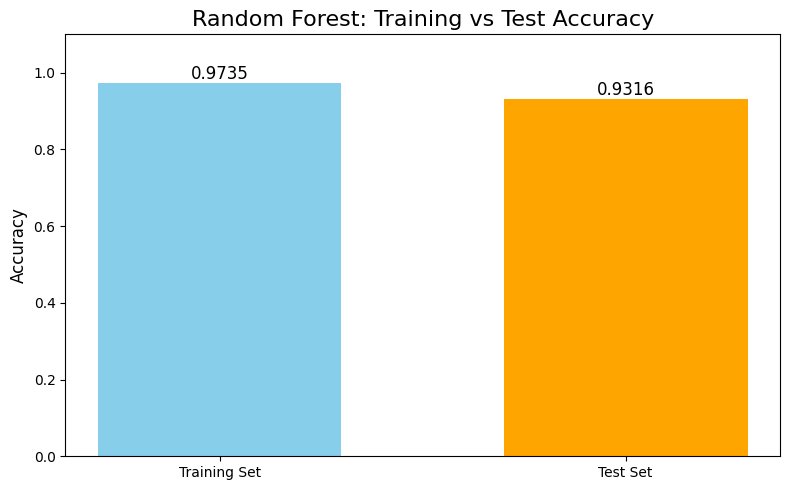

In [234]:
accuracy_train_rf = accuracy_score(y_train, y_train_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

# Data for plotting
datasets = ['Training Set', 'Test Set']
accuracies = [accuracy_train_rf, accuracy_rf]

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(datasets, accuracies, color=['skyblue', 'orange'], width=0.6)

# Add title and labels
plt.title('Random Forest: Training vs Test Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)  # Accuracy ranges between 0 and 1

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}',
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


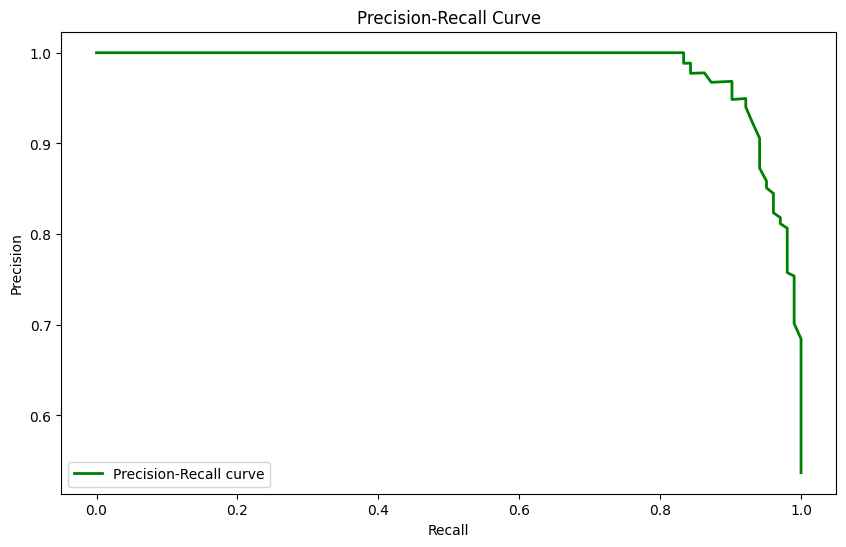

In [235]:
# Calculate Precision and Recall at different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(10,6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


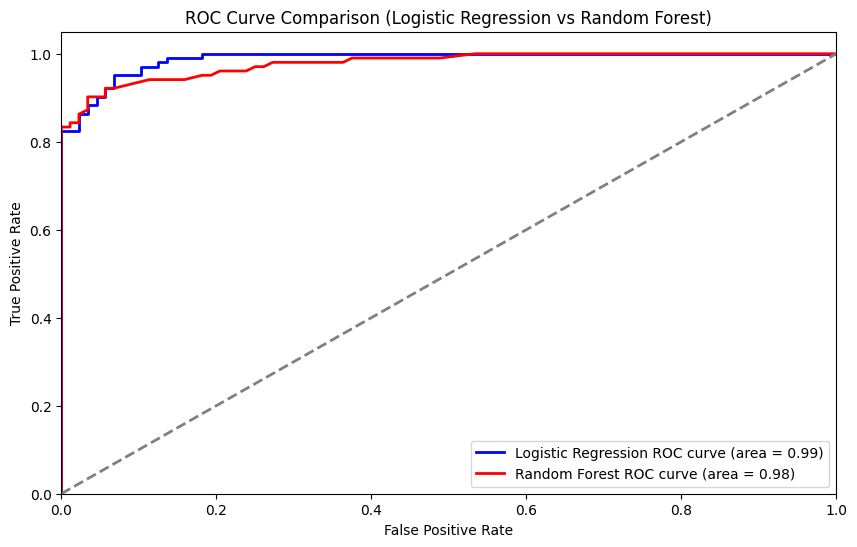

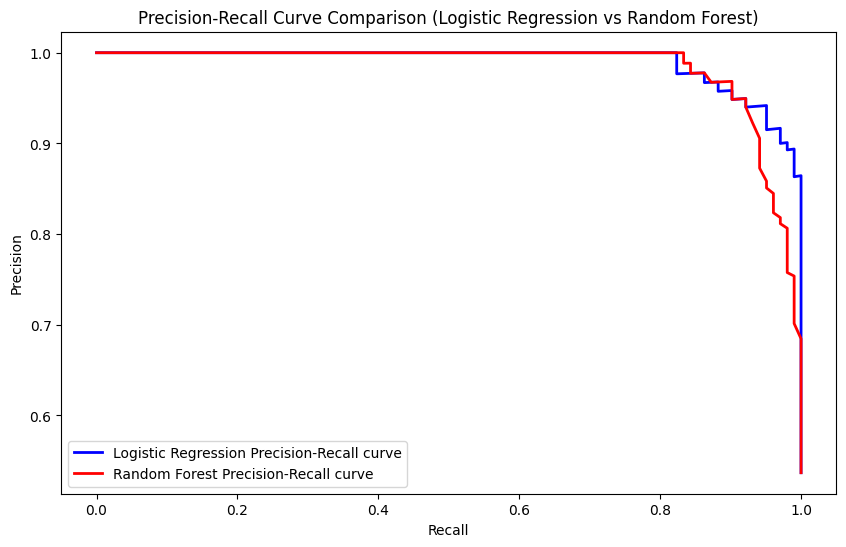

In [236]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Predict probabilities for Logistic Regression
y_pred_prob_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict probabilities for Random Forest
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# 1. ROC Curve Comparison (Logistic Regression vs Random Forest)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10,6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Logistic Regression vs Random Forest)')
plt.legend(loc='lower right')
plt.show()

# 2. Precision-Recall Curve Comparison (Logistic Regression vs Random Forest)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_pred_prob_logreg)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(10,6))
plt.plot(recall_logreg, precision_logreg, color='blue', lw=2, label='Logistic Regression Precision-Recall curve')
plt.plot(recall_rf, precision_rf, color='red', lw=2, label='Random Forest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison (Logistic Regression vs Random Forest)')
plt.legend(loc='lower left')
plt.show()


# **cross validation**

In [237]:
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Custom scorers for cross-validation
roc_auc = make_scorer(roc_auc_score, needs_proba=True)  # AUC
auprc = make_scorer(average_precision_score, needs_proba=True)  # AUPRC

# Stratified K-Folds to maintain the class distribution across folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [238]:
# Stratified K-Folds to maintain class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression Cross-Validation for AUC
logreg = LogisticRegression(random_state=42)
logreg_auc_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=skf, scoring=roc_auc)
logreg_auprc_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=skf, scoring=auprc)

print("Logistic Regression Cross-Validation:")
print(f"Mean AUC: {logreg_auc_scores.mean():.4f}")
print(f"Mean AUPRC: {logreg_auprc_scores.mean():.4f}")

# Random Forest Cross-Validation for AUC
rf = RandomForestClassifier(random_state=42)
rf_auc_scores = cross_val_score(rf, X_train_scaled, y_train, cv=skf, scoring=roc_auc)
rf_auprc_scores = cross_val_score(rf, X_train_scaled, y_train, cv=skf, scoring=auprc)

print("\nRandom Forest Cross-Validation:")
print(f"Mean AUC: {rf_auc_scores.mean():.4f}")
print(f"Mean AUPRC: {rf_auprc_scores.mean():.4f}")


Logistic Regression Cross-Validation:
Mean AUC: 0.9727
Mean AUPRC: 0.9776

Random Forest Cross-Validation:
Mean AUC: 0.9752
Mean AUPRC: 0.9805


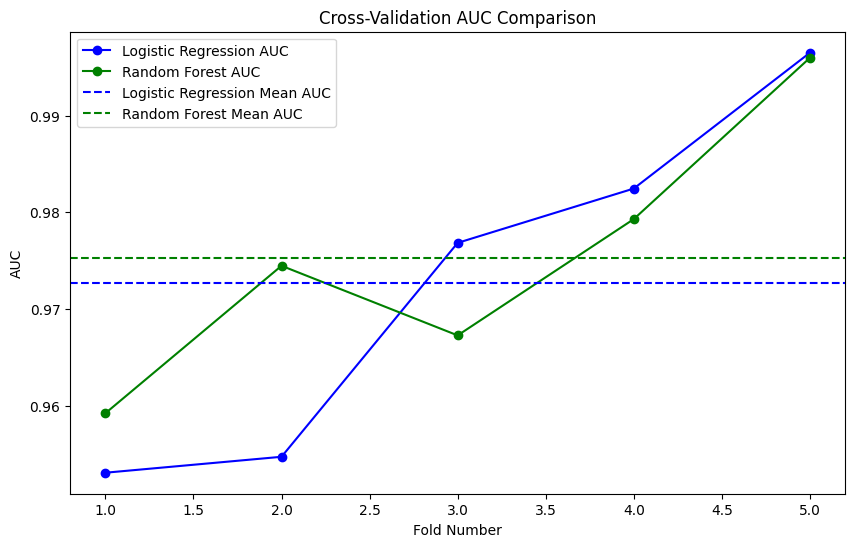

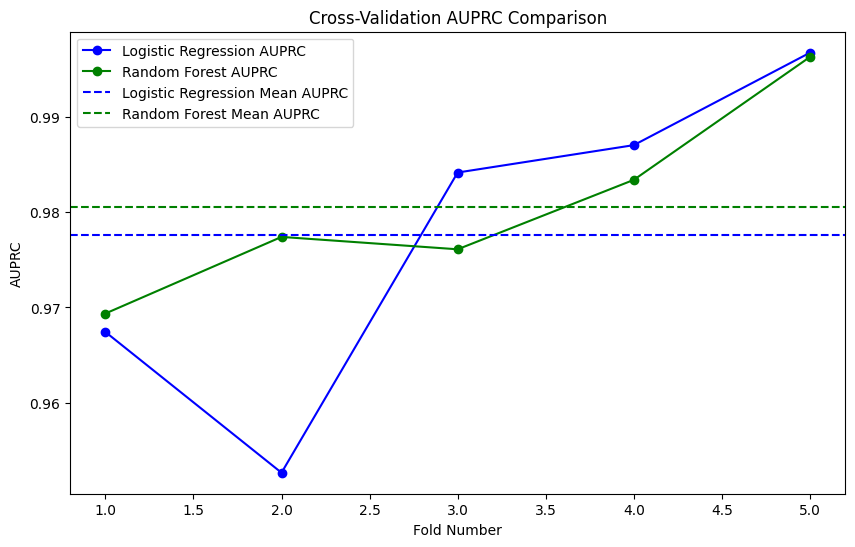

In [239]:
import matplotlib.pyplot as plt

# Plot AUC comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), logreg_auc_scores, marker='o', label='Logistic Regression AUC', color='blue')
plt.plot(range(1, 6), rf_auc_scores, marker='o', label='Random Forest AUC', color='green')
plt.axhline(y=logreg_auc_scores.mean(), linestyle='--', color='blue', label='Logistic Regression Mean AUC')
plt.axhline(y=rf_auc_scores.mean(), linestyle='--', color='green', label='Random Forest Mean AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Cross-Validation AUC Comparison')
plt.legend()
plt.show()

# Plot AUPRC comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), logreg_auprc_scores, marker='o', label='Logistic Regression AUPRC', color='blue')
plt.plot(range(1, 6), rf_auprc_scores, marker='o', label='Random Forest AUPRC', color='green')
plt.axhline(y=logreg_auprc_scores.mean(), linestyle='--', color='blue', label='Logistic Regression Mean AUPRC')
plt.axhline(y=rf_auprc_scores.mean(), linestyle='--', color='green', label='Random Forest Mean AUPRC')
plt.xlabel('Fold Number')
plt.ylabel('AUPRC')
plt.title('Cross-Validation AUPRC Comparison')
plt.legend()
plt.show()


# **Summery**<br>



Both Logistic Regression and Random Forest perform exceptionally well in detecting fraudulent transactions, with Random Forest having a slight edge in certain areas based on cross-validation results.

**Precision and Recall:** Both models perform similarly in detecting fraud, with Logistic Regression having slightly better precision, while Random Forest excels in AUPRC. AUPRC is crucial for imbalanced datasets, as it emphasizes the model's ability to correctly identify fraudulent transactions, making Random Forest the better choice in this regard.

**F1-Score:**  Logistic Regression slightly outperforms Random Forest in F1-Score, indicating a better overall balance between precision and recall.

**AUC and AUPRC:**
Random Forest demonstrates a higher AUC (0.9782) and AUPRC (0.9806), showing better overall performance in distinguishing between fraud and non-fraud, especially in an imbalanced dataset.
Logistic Regression also performs well with a mean AUC of 0.9701 and mean AUPRC of 0.9698, but slightly lags behind Random Forest in these key metrics.
Accuracy: Both models show similar accuracy scores, but accuracy is less informative for imbalanced datasets. Metrics like AUC, AUPRC, Precision, and Recall provide more meaningful insights.





# **Conclusion**


While both Logistic Regression and Random Forest perform well in detecting fraudulent transactions, Random Forest has a slight advantage in AUC and AUPRC, making it the better choice for this imbalanced dataset. Logistic Regression remains a strong contender due to its simplicity, interpretability, and balanced performance. For fraud detection in highly imbalanced datasets, Random Forest provides better overall performance, especially in distinguishing fraudulent transactions.

# **References**



**Dataset**:<br>
MLG-ULB Credit Card Fraud Detection Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud<br>


**Research** Papers:
Dal Pozzolo, A., Caelen, O., Le Borgne, Y., Waterschoot, S., & Bontempi, G. (2015). Calibrating probability with undersampling for unbalanced classification.<br><br>
Dal Pozzolo, A., Boracchi, G., Caelen, O., Alippi, C., & Bontempi, G. (2018). Credit card fraud detection: a realistic modeling and a novel learning strategy. IEEE Transactions on Neural Networks and Learning Systems, 29(8), 3784-3797.<br><br>
**Libraries and Tools**:<br><br>

Scikit-learn Documentation: https://scikit-learn.org/<br>
Pandas Documentation: https://pandas.pydata.org/ <br>
Matplotlib Documentation: https://matplotlib.org/ <br>
Seaborn Documentation: https://seaborn.pydata.org/ <br><br>
Others:
Articles and blogs on handling imbalanced datasets, feature scaling, and model evaluation metrics.

# New Section

In [240]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/Credit_Card_Fraud_Detection.ipynb --output /content/drive/MyDrive/credit.html


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Credit_Card_Fraud_Detection.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1265389 bytes to /content/drive/MyDrive/credit.html
